## Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18.5 * 0.65, 10.5 * 0.65)

from mlgear.utils import show, display_columns
from surveyweights import run_weighting_iteration, run_weighting_scheme, normalize_weights

## Load Processed Data

In [2]:
survey = pd.read_csv('responses_processed.csv')

## US National Weighting

In [3]:
demographics = ['gender', 'race', 'education', 'urban_rural', 'income', 'age', 'vote2016', 'region',
                'gss_trust', 'gss_bible', 'gss_spanking']
run_weighting_iteration(survey, weigh_on=demographics, census='US')

## gender ##
Female               1.185909
Male                 1.187571
Other                0.451289
Prefer not to say    1.175231
dtype: float64
ERROR: 0.19232314413157078
-
-
## race ##
Asian or Asian American      0.334284
Black or African American    1.392203
Hispanic or Latino           1.749385
Other                        0.647642
White or Caucasian           0.876486
dtype: float64
ERROR: 0.28804931119485483
-
-
## education ##
Completed graduate school     0.227285
Graduated from college        0.185166
Graduated from high school    0.769529
Less than high school         3.495891
Some college, no degree       0.322129
dtype: float64
ERROR: 0.7112515081454488
-
-
## urban_rural ##
Rural       1.129149
Suburban    0.968318
Urban       0.902533
dtype: float64
ERROR: 0.06517481049731534
-
-
## income ##
Between $100,000 and $150,000    1.079493
Between $15,000 and $49,999      0.701713
Between $50,000 and $74,999      0.750524
Between $75,000 and $99,999      0.825708
Over $150,

{'errors': [0.19232314413157078,
  0.28804931119485483,
  0.7112515081454488,
  0.06517481049731534,
  0.37931138965298145,
  0.6644828079804144,
  0.24555474973650315,
  0.20288846816707784,
  0.0498911167979389,
  0.4933532148954337,
  0.49180119246980597],
 'error_table': {'education': 2.49589082790985,
  'age': 1.5227713704132109,
  'income': 1.2849469691230722,
  'gss_bible': 1.05052933335863,
  'race': 0.749384610100271,
  'vote2016': 0.6660331033181364,
  'gss_spanking': 0.6229290625675958,
  'gender': 0.5487111371286466,
  'region': 0.4233518738136339,
  'urban_rural': 0.12914931298371424,
  'gss_trust': 0.058241349251847985},
 'weights': {'gender': Female               1.185909
  Male                 1.187571
  Other                0.451289
  Prefer not to say    1.175231
  dtype: float64,
  'race': Asian or Asian American      0.334284
  Black or African American    1.392203
  Hispanic or Latino           1.749385
  Other                        0.647642
  White or Caucasian  

In [4]:
output = run_weighting_scheme(survey, iters=50, weigh_on=demographics, census='US', verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 3.7840817136693454
ITER 3/50 - weight race - ERROR 3.581837073783632
ITER 4/50 - weight education - ERROR 3.326499312288478
ITER 5/50 - weight urban_rural - ERROR 2.7468361286477103
ITER 6/50 - weight income - ERROR 2.7167897755668284
ITER 7/50 - weight age - ERROR 2.69593545138137
ITER 8/50 - weight vote2016 - ERROR 2.693146116165451
ITER 9/50 - weight region - ERROR 2.224480120291157
ITER 10/50 - weight gss_trust - ERROR 1.7428818424922077
ITER 11/50 - weight gss_bible - ERROR 1.633000426862187
ITER 12/50 - weight gss_spanking - ERROR 1.440029532656399
ITER 13/50 - weight gender - ERROR 1.1988599279368246
ITER 14/50 - weight region - ERROR 1.050814262584369
ITER 15/50 - weight education - ERROR 0.9263556577121796
ITER 16/50 - weight vote2016 - ERROR 0.702770466756641
ITER 17/50 - weight race - ERROR 0.5582592629994121
ITER 18/50 - weight region - ERROR 0.5008578977121981
ITER 19/50 - weight age - ERROR 0.660135069

In [5]:
survey = output['final_df']
_ = run_weighting_iteration(survey, weigh_on=demographics, census='US')

## gender ##
Female               1.005968
Male                 1.006013
Other                0.993699
Prefer not to say    0.994320
dtype: float64
ERROR: 0.005993951081323668
-
-
## race ##
Asian or Asian American      1.006902
Black or African American    1.000274
Hispanic or Latino           0.999860
Other                        0.998851
White or Caucasian           0.994114
dtype: float64
ERROR: 0.004980019020029629
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 1.1342059977299232e-15
-
-
## urban_rural ##
Rural       0.995254
Suburban    0.998513
Urban       1.006232
dtype: float64
ERROR: 0.003451115321483781
-
-
## income ##
Between $100,000 and $150,000    1.005218
Between $15,000 and $49,999      0.991299
Between $50,000 and $74,999      0.998210
Between $75,000 and $99,999      1.002199
Over $150,000               

## Likely Voter

In [6]:
survey['lv_index'] = 0
survey['rv_index'] = 0
survey.loc[survey['lv_thought'] == 'Quite a lot', 'lv_index'] += 1
survey.loc[survey['lv_thought'] == 'Some', 'lv_index'] += 0.7
survey.loc[(survey['lv_plan_vote'] == 'Yes'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Very likely'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Likely'), 'lv_index'] += 0.7
survey.loc[(survey['lv_likely'] == 'Somewhat likely'), 'lv_index'] += 0.4
survey.loc[(survey['lv_likely'] == 'Neither likely nor unlikely'), 'lv_index'] += 0.2
survey.loc[(survey['lv_likely'] == 'Somewhat unlikely'), 'lv_index'] += 0.1
survey.loc[(survey['lv_likely'] == 'Unlikely'), 'lv_index'] += 0.05
survey.loc[(survey['age'] == '18-24'), 'lv_index'] += 1
survey.loc[(survey['age'] != '18-24') & (survey['vote2016'] != 'Did not vote'), 'lv_index'] += 1
survey.loc[survey['vote_method_plan'].isin(['In person on election day',
                                            'In person before election day',
                                            'By mail, and I’ve already requested and received my mail-in ballot']),
           'lv_index'] += 1
survey.loc[survey['vote_method_plan'] == 'By mail, and I’ve already requested my mail-in ballot', 'lv_index'] += 0.8
survey.loc[survey['vote_method_plan'] == 'By mail, but I haven\'t requested my mail-in ballot yet', 'lv_index'] += 0.4
survey.loc[survey['lv_already_voted'] == 'Yes', 'lv_index'] = survey['lv_index'].max()
survey.loc[~(survey['lv_registered'] == 'Yes'), 'lv_index'] = 0
survey.loc[(survey['lv_registered'] == 'Yes'), 'rv_index'] = 1

# https://www.pewresearch.org/methods/2016/01/07/measuring-the-likelihood-to-vote/
perry_gallup_loadings = {7: 0.83, 6: 0.63, 5: 0.59, 4: 0.4, 3: 0.34, 2: 0.23, 1: 0.13, 0: 0.11}
survey['lv_index'] = survey['lv_index'].apply(lambda l: perry_gallup_loadings[int(np.round(l * 2 * 0.7))])

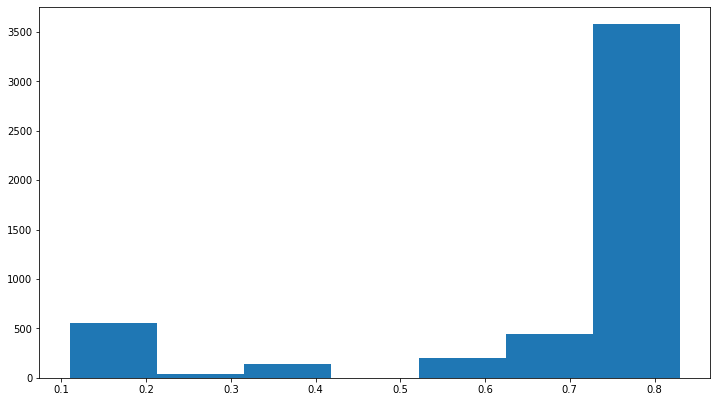

In [7]:
plt.hist(survey['lv_index'], bins=7)
plt.show()

In [8]:
survey['lv_index'].value_counts()

0.83    3574
0.11     510
0.63     438
0.59     203
0.40      72
0.34      63
0.23      42
0.13      42
Name: lv_index, dtype: int64

In [9]:
survey['lv_weight'] = normalize_weights(survey['weight'] * survey['lv_index'])
survey['rv_weight'] = normalize_weights(survey['weight'] * survey['rv_index'])
print(survey['lv_weight'].mean())
print(survey['rv_weight'].mean())

1.0
1.0


In [10]:
survey.to_csv('responses_processed_national_weighted.csv', index=False)

## California National Weighting

In [11]:
ca_national_survey = survey.copy()
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(ca_national_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               0.989934
Male                 1.022372
Other                0.993537
Prefer not to say    0.994157
dtype: float64
ERROR: 0.015907941005571906
-
-
## race ##
Asian or Asian American      1.539301
Black or African American    0.255498
Hispanic or Latino           1.594967
Other                        1.253354
White or Caucasian           0.356881
dtype: float64
ERROR: 0.6208532519471841
-
-
## education ##
Completed graduate school     1.005846
Graduated from college        0.954332
Graduated from high school    0.677624
Less than high school         1.406141
Some college, no degree       0.956057
dtype: float64
ERROR: 0.07634838603041459
-
-
## income ##
Between $100,000 and $150,000    1.024872
Between $15,000 and $49,999      0.983788
Between $50,000 and $74,999      0.956311
Between $75,000 and $99,999      0.967666
Over $150,000                    1.040108
Under $15,000                    1.027255
dtype: float64
ERROR: 0.027567034561116352
-
-
## ag

{'errors': [0.015907941005571906,
  0.6208532519471841,
  0.07634838603041459,
  0.027567034561116352,
  0.19090845034709664,
  0.17990832680348817],
 'error_table': {'race': 0.7445021409597745,
  'education': 0.4061408881074178,
  'vote2016': 0.33416807347972854,
  'age': 0.25165350644739903,
  'income': 0.04368859435786132,
  'gender': 0.022371893026877032},
 'weights': {'gender': Female               0.989934
  Male                 1.022372
  Other                0.993537
  Prefer not to say    0.994157
  dtype: float64,
  'race': Asian or Asian American      1.539301
  Black or African American    0.255498
  Hispanic or Latino           1.594967
  Other                        1.253354
  White or Caucasian           0.356881
  dtype: float64,
  'education': Completed graduate school     1.005846
  Graduated from college        0.954332
  Graduated from high school    0.677624
  Less than high school         1.406141
  Some college, no degree       0.956057
  dtype: float64,
  'incom

In [12]:
output = run_weighting_scheme(ca_national_survey, iters=30, weigh_on=demographics, census='US_CA', verbose=1)

ITER 1/1 - initialization - ERROR 30
ITER 2/30 - weight gender - ERROR 2.8339653847903445
ITER 3/30 - weight race - ERROR 2.644767825774195
ITER 4/30 - weight education - ERROR 2.2723445990450313
ITER 5/30 - weight income - ERROR 1.8250040451006582
ITER 6/30 - weight age - ERROR 1.3176666090630889
ITER 7/30 - weight vote2016 - ERROR 0.9662534673375625
ITER 8/30 - weight education - ERROR 0.6904317697289839
ITER 9/30 - weight gender - ERROR 0.6430449600966788
ITER 10/30 - weight age - ERROR 0.4961612556507548
ITER 11/30 - weight race - ERROR 0.3496157486334238
ITER 12/30 - weight income - ERROR 0.23055402685673776
ITER 13/30 - weight education - ERROR 0.25937208341447615
ITER 14/30 - weight age - ERROR 0.17549834809616563
ITER 15/30 - weight gender - ERROR 0.12637324365051128
ITER 16/30 - weight race - ERROR 0.11524449046308342
ITER 17/30 - weight education - ERROR 0.11945703272909716
ITER 18/30 - weight income - ERROR 0.08244972468381795
ITER 19/30 - weight age - ERROR 0.07228193195803

In [13]:
ca_national_survey = output['final_df']
ca_national_survey['lv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['lv_index'])
ca_national_survey['rv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['rv_index'])
_ = run_weighting_iteration(ca_national_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               1.006149
Male                 1.000033
Other                0.989773
Prefer not to say    1.004045
dtype: float64
ERROR: 0.0032680575497170557
-
-
## race ##
Asian or Asian American      1.000476
Black or African American    0.998568
Hispanic or Latino           1.003114
Other                        0.995352
White or Caucasian           1.002489
dtype: float64
ERROR: 0.0021877778683367837
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 1.5556595925148128e-15
-
-
## income ##
Between $100,000 and $150,000    1.000548
Between $15,000 and $49,999      0.997998
Between $50,000 and $74,999      0.998922
Between $75,000 and $99,999      1.001449
Over $150,000                    1.002305
Under $15,000                    0.998778
dtype: float64
ERROR: 0.0014628094252087814
-
-
## age ##
18-24    0.9

In [14]:
ca_national_survey.to_csv('responses_processed_ca_weighted.csv', index=False)

## California State Weighting

In [15]:
ca_state_survey = survey.copy()
ca_state_survey = ca_state_survey.loc[ca_state_survey['state'] == 'California']
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(ca_state_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               1.405405
Male                 1.028925
Other                0.634734
Prefer not to say    0.930936
dtype: float64
ERROR: 0.2059394911606493
-
-
## race ##
Asian or Asian American      0.880106
Black or African American    0.954859
Hispanic or Latino           1.333867
Other                        0.949091
White or Caucasian           0.882077
dtype: float64
ERROR: 0.14199488216388131
-
-
## education ##
Completed graduate school     0.985538
Graduated from college        0.872186
Graduated from high school    0.731966
Less than high school         1.540175
Some college, no degree       0.870135
dtype: float64
ERROR: 0.1303113911084589
-
-
## income ##
Between $100,000 and $150,000    0.731621
Between $15,000 and $49,999      1.259494
Between $50,000 and $74,999      1.565720
Between $75,000 and $99,999      1.011011
Over $150,000                    0.543150
Under $15,000                    0.889003
dtype: float64
ERROR: 0.2483558383712735
-
-
## age ##

{'errors': [0.2059394911606493,
  0.14199488216388131,
  0.1303113911084589,
  0.2483558383712735,
  0.14140328280678222,
  0.23845952681734198],
 'error_table': {'vote2016': 0.6132840514193181,
  'income': 0.5657204572837919,
  'education': 0.540175467582583,
  'gender': 0.4054050703268217,
  'race': 0.33386740274465065,
  'age': 0.3044039061331645},
 'weights': {'gender': Female               1.405405
  Male                 1.028925
  Other                0.634734
  Prefer not to say    0.930936
  dtype: float64,
  'race': Asian or Asian American      0.880106
  Black or African American    0.954859
  Hispanic or Latino           1.333867
  Other                        0.949091
  White or Caucasian           0.882077
  dtype: float64,
  'education': Completed graduate school     0.985538
  Graduated from college        0.872186
  Graduated from high school    0.731966
  Less than high school         1.540175
  Some college, no degree       0.870135
  dtype: float64,
  'income': Betwe

In [16]:
output = run_weighting_scheme(ca_state_survey, iters=30, weigh_on=demographics, census='US_CA', verbose=1)

ITER 1/1 - initialization - ERROR 30
ITER 2/30 - weight gender - ERROR 2.5903116725511373
ITER 3/30 - weight race - ERROR 2.4999715508461153
ITER 4/30 - weight education - ERROR 2.2181015228169274
ITER 5/30 - weight income - ERROR 1.8467481425903904
ITER 6/30 - weight age - ERROR 1.2999881958578943
ITER 7/30 - weight vote2016 - ERROR 1.2348418484434192
ITER 8/30 - weight gender - ERROR 0.8188694728437703
ITER 9/30 - weight education - ERROR 0.9577139089747857
ITER 10/30 - weight race - ERROR 1.004133201208943
ITER 11/30 - weight gender - ERROR 0.5676094295914892
ITER 12/30 - weight age - ERROR 0.5064750470239671
ITER 13/30 - weight education - ERROR 0.45135451763054374
ITER 14/30 - weight gender - ERROR 0.374312004510184
ITER 15/30 - weight race - ERROR 0.4263070847656778
ITER 16/30 - weight age - ERROR 0.27208427480755726
ITER 17/30 - weight education - ERROR 0.34406753585389144
ITER 18/30 - weight gender - ERROR 0.2638233653744562
ITER 19/30 - weight income - ERROR 0.1954452983999039

In [17]:
ca_state_survey = output['final_df']
ca_state_survey['lv_weight'] = normalize_weights(ca_state_survey['weight'] * ca_state_survey['lv_index'])
ca_state_survey['rv_weight'] = normalize_weights(ca_state_survey['weight'] * ca_state_survey['rv_index'])
_ = run_weighting_iteration(ca_state_survey, weigh_on=demographics, census='US_CA')

## gender ##
Female               0.990621
Male                 0.979847
Other                0.974460
Prefer not to say    1.055073
dtype: float64
ERROR: 0.015410100371992018
-
-
## race ##
Asian or Asian American      1.034810
Black or African American    0.983266
Hispanic or Latino           1.062314
Other                        0.947882
White or Caucasian           0.971728
dtype: float64
ERROR: 0.03544176217787231
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 4.543891304886749e-16
-
-
## income ##
Between $100,000 and $150,000    0.985052
Between $15,000 and $49,999      0.989135
Between $50,000 and $74,999      1.007707
Between $75,000 and $99,999      1.001149
Over $150,000                    1.007865
Under $15,000                    1.009092
dtype: float64
ERROR: 0.008938351576077249
-
-
## age ##
18-24    0.991044

In [18]:
ca_state_survey.to_csv('responses_processed_ca_state_ca_weighted.csv', index=False)

## Texas National Weighting

In [19]:
tx_national_survey = survey.copy()
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(tx_national_survey, weigh_on=demographics, census='US_TX')

## gender ##
Female               0.989934
Male                 1.022372
Other                0.993537
Prefer not to say    0.994157
dtype: float64
ERROR: 0.015907941005571906
-
-
## race ##
Asian or Asian American      0.694811
Black or African American    0.732344
Hispanic or Latino           2.137654
Other                        0.899108
White or Caucasian           0.536083
dtype: float64
ERROR: 0.46464281564712406
-
-
## education ##
Completed graduate school     0.860357
Graduated from college        0.901446
Graduated from high school    0.853471
Less than high school         1.393466
Some college, no degree       0.991260
dtype: float64
ERROR: 0.08866660651066742
-
-
## income ##
Between $100,000 and $150,000    0.925600
Between $15,000 and $49,999      1.202489
Between $50,000 and $74,999      0.980168
Between $75,000 and $99,999      0.975412
Over $150,000                    0.738295
Under $15,000                    1.178035
dtype: float64
ERROR: 0.13342594562059223
-
-
## ag

{'errors': [0.015907941005571906,
  0.46464281564712406,
  0.08866660651066742,
  0.13342594562059223,
  0.12064641019116047,
  0.0886736604004482],
 'error_table': {'race': 1.137654201904041,
  'education': 0.393465849899322,
  'income': 0.2617050941586818,
  'vote2016': 0.18768547916274825,
  'age': 0.15093805292255724,
  'gender': 0.022371893026877032},
 'weights': {'gender': Female               0.989934
  Male                 1.022372
  Other                0.993537
  Prefer not to say    0.994157
  dtype: float64,
  'race': Asian or Asian American      0.694811
  Black or African American    0.732344
  Hispanic or Latino           2.137654
  Other                        0.899108
  White or Caucasian           0.536083
  dtype: float64,
  'education': Completed graduate school     0.860357
  Graduated from college        0.901446
  Graduated from high school    0.853471
  Less than high school         1.393466
  Some college, no degree       0.991260
  dtype: float64,
  'income': 

In [20]:
output = run_weighting_scheme(tx_national_survey, iters=40, weigh_on=demographics, census='US_TX',
                              early_terminate=False, verbose=1)

ITER 1/1 - initialization - ERROR 40
ITER 2/40 - weight gender - ERROR 2.9411601077644214
ITER 3/40 - weight race - ERROR 2.746011674281798
ITER 4/40 - weight education - ERROR 2.3815956259758737
ITER 5/40 - weight income - ERROR 1.8413799489656197
ITER 6/40 - weight age - ERROR 1.373380909237667
ITER 7/40 - weight vote2016 - ERROR 1.1917539301168762
ITER 8/40 - weight vote2016 - ERROR 0.9933308225565194
ITER 9/40 - weight vote2016 - ERROR 0.7152234995799936
ITER 10/40 - weight education - ERROR 0.6161007636576111
ITER 11/40 - weight gender - ERROR 0.5997677097311876
ITER 12/40 - weight race - ERROR 0.49107143583326823
ITER 13/40 - weight age - ERROR 0.3548192446117676
ITER 14/40 - weight income - ERROR 0.2651665986267461
ITER 15/40 - weight gender - ERROR 0.18609177804119345
ITER 16/40 - weight education - ERROR 0.18893170870220707
ITER 17/40 - weight gender - ERROR 0.17274227880991125
ITER 18/40 - weight race - ERROR 0.16549415687045807
ITER 19/40 - weight age - ERROR 0.1041143988771

In [21]:
tx_national_survey = output['final_df']
tx_national_survey['lv_weight'] = normalize_weights(tx_national_survey['weight'] * tx_national_survey['lv_index'])
tx_national_survey['rv_weight'] = normalize_weights(tx_national_survey['weight'] * tx_national_survey['rv_index'])
_ = run_weighting_iteration(tx_national_survey, weigh_on=demographics, census='US_TX')

## gender ##
Female               1.001569
Male                 1.000170
Other                0.998662
Prefer not to say    0.999599
dtype: float64
ERROR: 0.0008895892378991874
-
-
## race ##
Asian or Asian American      1.0
Black or African American    1.0
Hispanic or Latino           1.0
Other                        1.0
White or Caucasian           1.0
dtype: float64
ERROR: 4.7129910545965614e-15
-
-
## education ##
Completed graduate school     0.998398
Graduated from college        0.999486
Graduated from high school    1.000897
Less than high school         1.000809
Some college, no degree       1.000410
dtype: float64
ERROR: 0.0007305665709355671
-
-
## income ##
Between $100,000 and $150,000    1.000044
Between $15,000 and $49,999      0.999941
Between $50,000 and $74,999      1.000105
Between $75,000 and $99,999      0.999848
Over $150,000                    1.000127
Under $15,000                    0.999935
dtype: float64
ERROR: 8.123078770780089e-05
-
-
## age ##
18-24    0.9

In [22]:
tx_national_survey.to_csv('responses_processed_tx_weighted.csv', index=False)

## Texas State Weighting

In [23]:
tx_state_survey = survey.copy()
tx_state_survey = tx_state_survey.loc[tx_state_survey['state'] == 'Texas']
demographics = ['gender', 'race', 'education', 'income', 'age', 'vote2016']
run_weighting_iteration(tx_state_survey, weigh_on=demographics, census='US_TX')

## gender ##
Female               0.955909
Male                 0.899009
Other                1.140104
Prefer not to say    1.004978
dtype: float64
ERROR: 0.07248009335153167
-
-
## race ##
Asian or Asian American      0.935471
Black or African American    0.935836
Hispanic or Latino           1.593764
Other                        0.456749
White or Caucasian           1.078180
dtype: float64
ERROR: 0.16943276556733491
-
-
## education ##
Completed graduate school     0.659858
Graduated from college        0.952595
Graduated from high school    0.952539
Less than high school         1.780167
Some college, no degree       0.654840
dtype: float64
ERROR: 0.2067275670180331
-
-
## income ##
Between $100,000 and $150,000    1.204923
Between $15,000 and $49,999      1.763398
Between $50,000 and $74,999      0.740604
Between $75,000 and $99,999      0.456686
Over $150,000                    0.802162
Under $15,000                    1.032227
dtype: float64
ERROR: 0.3865971180626283
-
-
## age #

{'errors': [0.07248009335153167,
  0.16943276556733491,
  0.2067275670180331,
  0.3865971180626283,
  0.29386202476802736,
  0.25683934016350385],
 'error_table': {'vote2016': 0.787735234134703,
  'education': 0.7801674671783805,
  'income': 0.7633982295098884,
  'race': 0.593763645924515,
  'age': 0.3391296970468505,
  'gender': 0.14010422375320553},
 'weights': {'gender': Female               0.955909
  Male                 0.899009
  Other                1.140104
  Prefer not to say    1.004978
  dtype: float64,
  'race': Asian or Asian American      0.935471
  Black or African American    0.935836
  Hispanic or Latino           1.593764
  Other                        0.456749
  White or Caucasian           1.078180
  dtype: float64,
  'education': Completed graduate school     0.659858
  Graduated from college        0.952595
  Graduated from high school    0.952539
  Less than high school         1.780167
  Some college, no degree       0.654840
  dtype: float64,
  'income': Betwe

In [24]:
output = run_weighting_scheme(tx_state_survey, iters=50, weigh_on=demographics, census='US_TX', verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 2.6535813806478883
ITER 3/50 - weight race - ERROR 2.4330508095498007
ITER 4/50 - weight education - ERROR 2.493263501107098
ITER 5/50 - weight income - ERROR 1.6788553284847687
ITER 6/50 - weight age - ERROR 1.716109679105416
ITER 7/50 - weight vote2016 - ERROR 2.0844012412113235
ITER 8/50 - weight gender - ERROR 0.9125654473714068
ITER 9/50 - weight education - ERROR 0.8294766344590312
ITER 10/50 - weight race - ERROR 0.9792986727138786
ITER 11/50 - weight age - ERROR 0.6188269619269393
ITER 12/50 - weight income - ERROR 0.5746423537809641
ITER 13/50 - weight education - ERROR 0.6734446766162119
ITER 14/50 - weight vote2016 - ERROR 0.5766829743890171
ITER 15/50 - weight gender - ERROR 0.4708160451348208
ITER 16/50 - weight race - ERROR 0.49115634882999437
ITER 17/50 - weight age - ERROR 0.35569716788560574
ITER 18/50 - weight education - ERROR 0.34999567057213293
ITER 19/50 - weight income - ERROR 0.30699858608791

In [25]:
tx_state_survey = output['final_df']
tx_state_survey['lv_weight'] = normalize_weights(tx_state_survey['weight'] * tx_state_survey['lv_index'])
tx_state_survey['rv_weight'] = normalize_weights(tx_state_survey['weight'] * tx_state_survey['rv_index'])
_ = run_weighting_iteration(tx_state_survey, weigh_on=demographics, census='US_TX')

## gender ##
Female               1.003684
Male                 1.010388
Other                0.998740
Prefer not to say    0.987188
dtype: float64
ERROR: 0.0067939562760651415
-
-
## race ##
Asian or Asian American      0.995939
Black or African American    0.990139
Hispanic or Latino           1.003636
Other                        1.014820
White or Caucasian           0.995466
dtype: float64
ERROR: 0.00523949134667648
-
-
## education ##
Completed graduate school     0.989662
Graduated from college        0.984899
Graduated from high school    0.993355
Less than high school         1.025545
Some college, no degree       1.006539
dtype: float64
ERROR: 0.01064021751793558
-
-
## income ##
Between $100,000 and $150,000    1.0
Between $15,000 and $49,999      1.0
Between $50,000 and $74,999      1.0
Between $75,000 and $99,999      1.0
Over $150,000                    1.0
Under $15,000                    1.0
dtype: float64
ERROR: 2.67908519047723e-16
-
-
## age ##
18-24    0.971985
25-44

In [26]:
tx_state_survey.to_csv('responses_processed_tx_state_tx_weighted.csv', index=False)